Forecasting the S&P 500: A Comparative Analysis of Traditional and Non-Linear Macroeconomic Indicators and Commodity Linkages Using Artificial Intelligence Models

Varnika Kothari, Rami Abi Akl

Datasets Used:

US Stock Market Data: S&P 500 Index (1901-2025):
Author: Ahmadul Karim Chowdhury
https://www.kaggle.com/datasets/ahmadulkc/s-and-p-500-historical-monthly-prices-19012025

Crude Oil Price (1983-Present):
Author: Chandan Singh
License: CCO: Public Domain
https://www.kaggle.com/datasets/sc231997/crude-oil-price

Gold, Silver & Precious Metals Futures (2000-2024):
Author: Guillem SD
License: Attribution-NonCommercial 4.0 International
https://www.kaggle.com/datasets/guillemservera/precious-metals-data

USA Macroeconomic Rate of Changes (1993-2025):
Data collected from FRED-Federal Reserve Economic Data from the Bank of St.Louis
https://fred.stlouisfed.org/
Compiled Dataset:- https://docs.google.com/spreadsheets/d/10q3gGOYpTtAfJsDukJU2x3SYuyGlvYIq/edit?usp=sharing&ouid=117010112379515535428&rtpof=true&sd=true

*Note that all model results print MSE that is Mean Squared Error which is then mathematically square rooted to obtain RMSE or Root Mean Squared Error

#USA S&P 500 Dataset

In [ ]:
#To import the dataset and create a new one with only data after 1993

import pandas as pd
import kagglehub
import datetime

FILE_PATH = "S_P 500 Historical Data.csv"
NEW_FILE_NAME = "SP500_1993_onwards.csv"
START_DATE_FILTER = '1993-01-01'

df_SP = kagglehub.load_dataset(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "ahmadulkc/s-and-p-500-historical-monthly-prices-19012025",
    FILE_PATH,
    pandas_kwargs={
        'thousands': ',',
    }
)
df_SP['Date'] = pd.to_datetime(df_SP['Date'], format='%m-%d-%y', errors='coerce')

df_SP['Date'] = df_SP['Date'].apply(lambda x: x.replace(year=x.year - 100)
                                    if pd.notna(x) and x.year < 1993
                                    else x)

df_SP['Change %'] = df_SP['Change %'].astype(str).str.replace('%', '', regex=False)
df_SP['Change %'] = pd.to_numeric(df_SP['Change %'], errors='coerce') / 100

numeric_cols_to_check = ['Price', 'Open', 'High', 'Low']
for col in numeric_cols_to_check:
    if col in df_SP.columns and df_SP[col].dtype == 'object':
        df_SP[col] = pd.to_numeric(df_SP[col], errors='coerce')

df_1993_onwards = df_SP[df_SP['Date'] >= START_DATE_FILTER].copy()

df_1993_onwards = df_1993_onwards.drop(columns=['Open', 'High','Low'])

/tmp/ipython-input-471302032.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_SP = kagglehub.load_dataset(


100%|██████████| 31.6k/31.6k [00:00<00:00, 9.01MB/s]

New dataset 'SP500_1993_onwards.csv' created successfully.
It contains 389 rows and 6 columns.
Date range: 1993-01-01 to 2025-05-01


In [ ]:
df_1993_onwards['Date'] = pd.to_datetime(df_1993_onwards['Date'])

df_1993_onwards['Year'] = df_1993_onwards['Date'].dt.year
df_1993_onwards['Month'] = df_1993_onwards['Date'].dt.month

In [ ]:
df_1993_onwards.head()

,Date,Price,Change %,Year,Month
0,2025-05-01,5844.17,0.0494,2025,5
1,2025-04-01,5569.06,-0.0076,2025,4
2,2025-03-01,5611.85,-0.0575,2025,3
3,2025-02-01,5954.50,-0.0142,2025,2
4,2025-01-01,6040.53,0.0270,2025,1


#Crude Oil


In [ ]:
#To import the dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "crude-oil-price.csv"

df_Crude = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sc231997/crude-oil-price",
  file_path,
)


/tmp/ipython-input-195758608.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_Crude = kagglehub.load_dataset(


100%|██████████| 22.0k/22.0k [00:00<00:00, 21.7MB/s]


,date,price,percentChange,change
0,1983-03-01 00:00:00+00:00,29.27,NaN,NaN
1,1983-04-01 00:00:00+00:00,30.63,4.646,1.36
2,1983-05-01 00:00:00+00:00,30.25,-1.241,-0.38
3,1983-06-01 00:00:00+00:00,31.38,3.736,1.13
4,1983-07-01 00:00:00+00:00,32.00,1.976,0.62


#Gold, Silver

In [ ]:
#To import the dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "all_commodities_data.csv"
df_commodity = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "guillemservera/precious-metals-data",
  file_path,
)

/tmp/ipython-input-995524581.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_commodity = kagglehub.load_dataset(


100%|██████████| 406k/406k [00:00<00:00, 20.6MB/s]

Extracting zip of all_commodities_data.csv...


,ticker,commodity,date,open,high,low,close,volume
0,GC=F,Gold,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,GC=F,Gold,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,GC=F,Gold,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,GC=F,Gold,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,GC=F,Gold,2000-09-06,274.200012,274.200012,274.200012,274.200012,0
5,GC=F,Gold,2000-09-07,274.000000,274.000000,274.000000,274.000000,125
6,GC=F,Gold,2000-09-08,273.299988,273.299988,273.299988,273.299988,0
7,GC=F,Gold,2000-09-11,273.100006,273.100006,273.100006,273.100006,0
8,GC=F,Gold,2000-09-12,272.899994,272.899994,272.899994,272.899994,0
9,GC=F,Gold,2000-09-13,272.799988,272.799988,272.799988,272.799988,0


In [ ]:
df_commodity.head()

#Macroeconomic Indicators


In [ ]:
#Please download Macro.xlsx using the link given at the beginning and save it in My Drive
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount("/content/drive")

df_indicators = pd.read_excel("/content/drive/My Drive/Macro.xlsx")


Mounted at /content/drive


In [ ]:
df_indicators['Year'] = df_indicators['observation_date'].dt.year
df_indicators['Month'] = df_indicators['observation_date'].dt.month

df_indicators.head()

,observation_date,Unemployment_Rate,Retail_Sales,Producer_Price_Index,Industrial_Production,Consumer_Price_Index,Trade_Balance,Personal_Consumption_Expenditures,National_Home_Price_Index,All_Employees(Total_Nonfarm),Labor_Force_Participation_Rate,Money_Supply_(M2),Personal_Income,Consumer_Sentiment,Year,Month
0,1993-01-01,7.3,152329,118.0,64.6135,142.8,-3871.0,4340.7,76.786,109790,66.2,2394.3,7648.1,89.3,1993,1
1,1993-02-01,7.1,151742,118.4,64.9262,143.1,-3596.0,4355.3,76.840,110048,66.2,2386.1,7684.5,86.6,1993,2
2,1993-03-01,7.0,150525,118.7,64.8627,143.3,-6777.0,4352.5,76.870,110004,66.2,2380.8,7660.8,85.9,1993,3
3,1993-04-01,7.1,154720,119.3,65.0423,143.8,-6445.0,4393.4,76.938,110300,66.1,2372.3,7700.6,85.6,1993,4
4,1993-05-01,7.1,155537,119.7,64.8006,144.2,-4369.0,4422.4,77.039,110571,66.4,2383.4,7689.4,80.3,1993,5


In [ ]:
df_indicators.head()

#Final Data Set Creation

In [ ]:
#The dataset created in this code bloc is only used for testing the RNN Models and is simply a theoretical representation as it assumes SP500 Prices remain constant throughout a month

import pandas as pd

# --- Preprocessing for df_1993_onwards (SP500 data) ---
df_1993_onwards['Date'] = pd.to_datetime(df_1993_onwards['Date'])
df_1993_onwards['Year'] = df_1993_onwards['Date'].dt.year
df_1993_onwards['Month'] = df_1993_onwards['Date'].dt.month
# Rename the 'Price' column for SP500
df_1993_onwards = df_1993_onwards.rename(columns={'Price': 'SP500_Price'})


# --- Preprocessing for df_Crude ---
df_Crude['date'] = pd.to_datetime(df_Crude['date'])
df_Crude['Year'] = df_Crude['date'].dt.year
df_Crude['Month'] = df_Crude['date'].dt.month
# Rename the 'price' column for Crude (optional, but good for consistency)
df_Crude = df_Crude.rename(columns={'price': 'Crude_Price'})


# --- Preprocessing for df_commodity (Gold data) ---
# 1. Filter for 'Gold' commodity
df_gold_commodity = df_commodity[df_commodity['commodity'] == 'Gold'].copy()
df_silver_commodity = df_commodity[df_commodity['commodity'] == 'Silver'].copy()
df_gold_commodity = df_gold_commodity.rename(columns={'close': 'Gold_Price'})
df_silver_commodity = df_silver_commodity.rename(columns={'close': 'Silver_Price'})
# 2. Convert 'date' to datetime and extract 'Year' and 'Month'
df_gold_commodity['date'] = pd.to_datetime(df_gold_commodity['date'])
df_gold_commodity['Year'] = df_gold_commodity['date'].dt.year
df_gold_commodity['Month'] = df_gold_commodity['date'].dt.month
df_silver_commodity['date'] = pd.to_datetime(df_silver_commodity['date'])
df_silver_commodity['Year'] = df_silver_commodity['date'].dt.year
df_silver_commodity['Month'] = df_silver_commodity['date'].dt.month

# --- Perform sequential merges ---

# First merge: df_1993_onwards (SP500) with df_indicators
merged_df_step1 = pd.merge(df_1993_onwards, df_indicators, on=['Year', 'Month'], how='inner')

# Second merge: result of step 1 with df_Crude
merged_df_step2 = pd.merge(merged_df_step1, df_Crude, on=['Year', 'Month'], how='inner')

# Final merge: result of step 2 with the filtered df_gold_commodity
merged_df_step3 = pd.merge(merged_df_step2, df_gold_commodity, on=['Year', 'Month'], how='inner')
merged_df = pd.merge(merged_df_step3, df_silver_commodity, on=['Year', 'Month'], how='inner')
merged_df.head()

merged_df['SP500_NextPrice']=merged_df['SP500_Price'].shift(-1)
merged_df=merged_df.iloc[:-1]


In [ ]:
merged_df.head()

,Date,SP500_Price,Change %,Year,Month,observation_date,Unemployment_Rate,Retail_Sales,Producer_Price_Index,Industrial_Production,...,volume_x,ticker_y,commodity_y,date,open_y,high_y,low_y,Silver_Price,volume_y,SP500_NextPrice
0,2024-06-01,5460.48,0.0347,2024,6,2024-06-01,4.1,599979,255.914,103.2534,...,781,SI=F,Silver,2024-06-03,30.440001,30.641001,29.850000,30.641001,209,5460.48
1,2024-06-01,5460.48,0.0347,2024,6,2024-06-01,4.1,599979,255.914,103.2534,...,781,SI=F,Silver,2024-06-04,29.754999,29.995001,29.469999,29.488001,39,5460.48
2,2024-06-01,5460.48,0.0347,2024,6,2024-06-01,4.1,599979,255.914,103.2534,...,781,SI=F,Silver,2024-06-05,29.549999,29.969999,29.549999,29.948000,16,5460.48
3,2024-06-01,5460.48,0.0347,2024,6,2024-06-01,4.1,599979,255.914,103.2534,...,781,SI=F,Silver,2024-06-06,30.559999,31.320000,30.559999,31.247000,282,5460.48
4,2024-06-01,5460.48,0.0347,2024,6,2024-06-01,4.1,599979,255.914,103.2534,...,781,SI=F,Silver,2024-06-07,31.525000,31.525000,29.299999,29.334999,10,5460.48


In [ ]:

#This is the dataset used for testing other models except RNN, and consists of SP500 Prices for the 1st date of every month.

# --- Preprocessing for df_commodity (Gold data) ---

# 2. Convert 'date' to datetime and extract 'Year' and 'Month'
monthly_avg_gold = df_gold_commodity.groupby(df_gold_commodity["date"].dt.to_period("M"))["Gold_Price"].mean().reset_index()
monthly_avg_gold['Year'] = monthly_avg_gold['date'].dt.year
monthly_avg_gold['Month'] = monthly_avg_gold['date'].dt.month
monthly_avg_silver = df_silver_commodity.groupby(df_silver_commodity["date"].dt.to_period("M"))["Silver_Price"].mean().reset_index()
monthly_avg_silver['Year'] = monthly_avg_silver['date'].dt.year
monthly_avg_silver['Month'] = monthly_avg_silver['date'].dt.month

# --- Perform sequential merges ---
# Final merge: result of step 2 with the filtered df_gold_commodity
merged_df_small = pd.merge(merged_df_step2, monthly_avg_gold, on=['Year', 'Month'], how='inner')
smallmerged_df = pd.merge(merged_df_small, monthly_avg_silver, on=['Year', 'Month'], how='inner')
smallmerged_df['SP500_NextPrice']=smallmerged_df['SP500_Price'].shift(-1)
smallmerged_df=smallmerged_df.iloc[:-1]
smallmerged_df.head()




,Date,SP500_Price,Change %,Year,Month,observation_date,Unemployment_Rate,Retail_Sales,Producer_Price_Index,Industrial_Production,...,Consumer_Sentiment,date_x,Crude_Price,percentChange,change,date_y,Gold_Price,date,Silver_Price,SP500_NextPrice
281,2001-01-01,1366.0,0.0346,2001,1,2001-01-01,4.2,247339,140.0,91.8908,...,94.7,2001-01-01 00:00:00+00:00,28.66,6.940,1.86,2001-01,265.371427,2001-01,4.674238,1320.3
282,2000-12-01,1320.3,0.0040,2000,12,2000-12-01,3.9,243844,136.2,92.3457,...,98.4,2000-12-01 00:00:00+00:00,26.80,-20.757,-7.02,2000-12,271.515005,2000-12,4.631400,1315.0
283,2000-11-01,1315.0,-0.0800,2000,11,2000-11-01,3.9,243846,135.0,92.6604,...,107.6,2000-11-01 00:00:00+00:00,33.82,3.425,1.12,2000-11,265.874997,2000-11,4.690350,1429.4
284,2000-10-01,1429.4,-0.0049,2000,10,2000-10-01,3.9,245399,135.4,92.6400,...,105.8,2000-10-01 00:00:00+00:00,32.70,6.031,1.86,2000-10,269.809090,2000-10,4.841136,1436.5
285,2000-09-01,1436.5,-0.0535,2000,9,2000-09-01,3.9,245520,134.7,92.9827,...,106.8,2000-09-01 00:00:00+00:00,30.84,-6.884,-2.28,2000-09,273.389996,2000-09,4.916100,1517.7


#Correlation Matrices

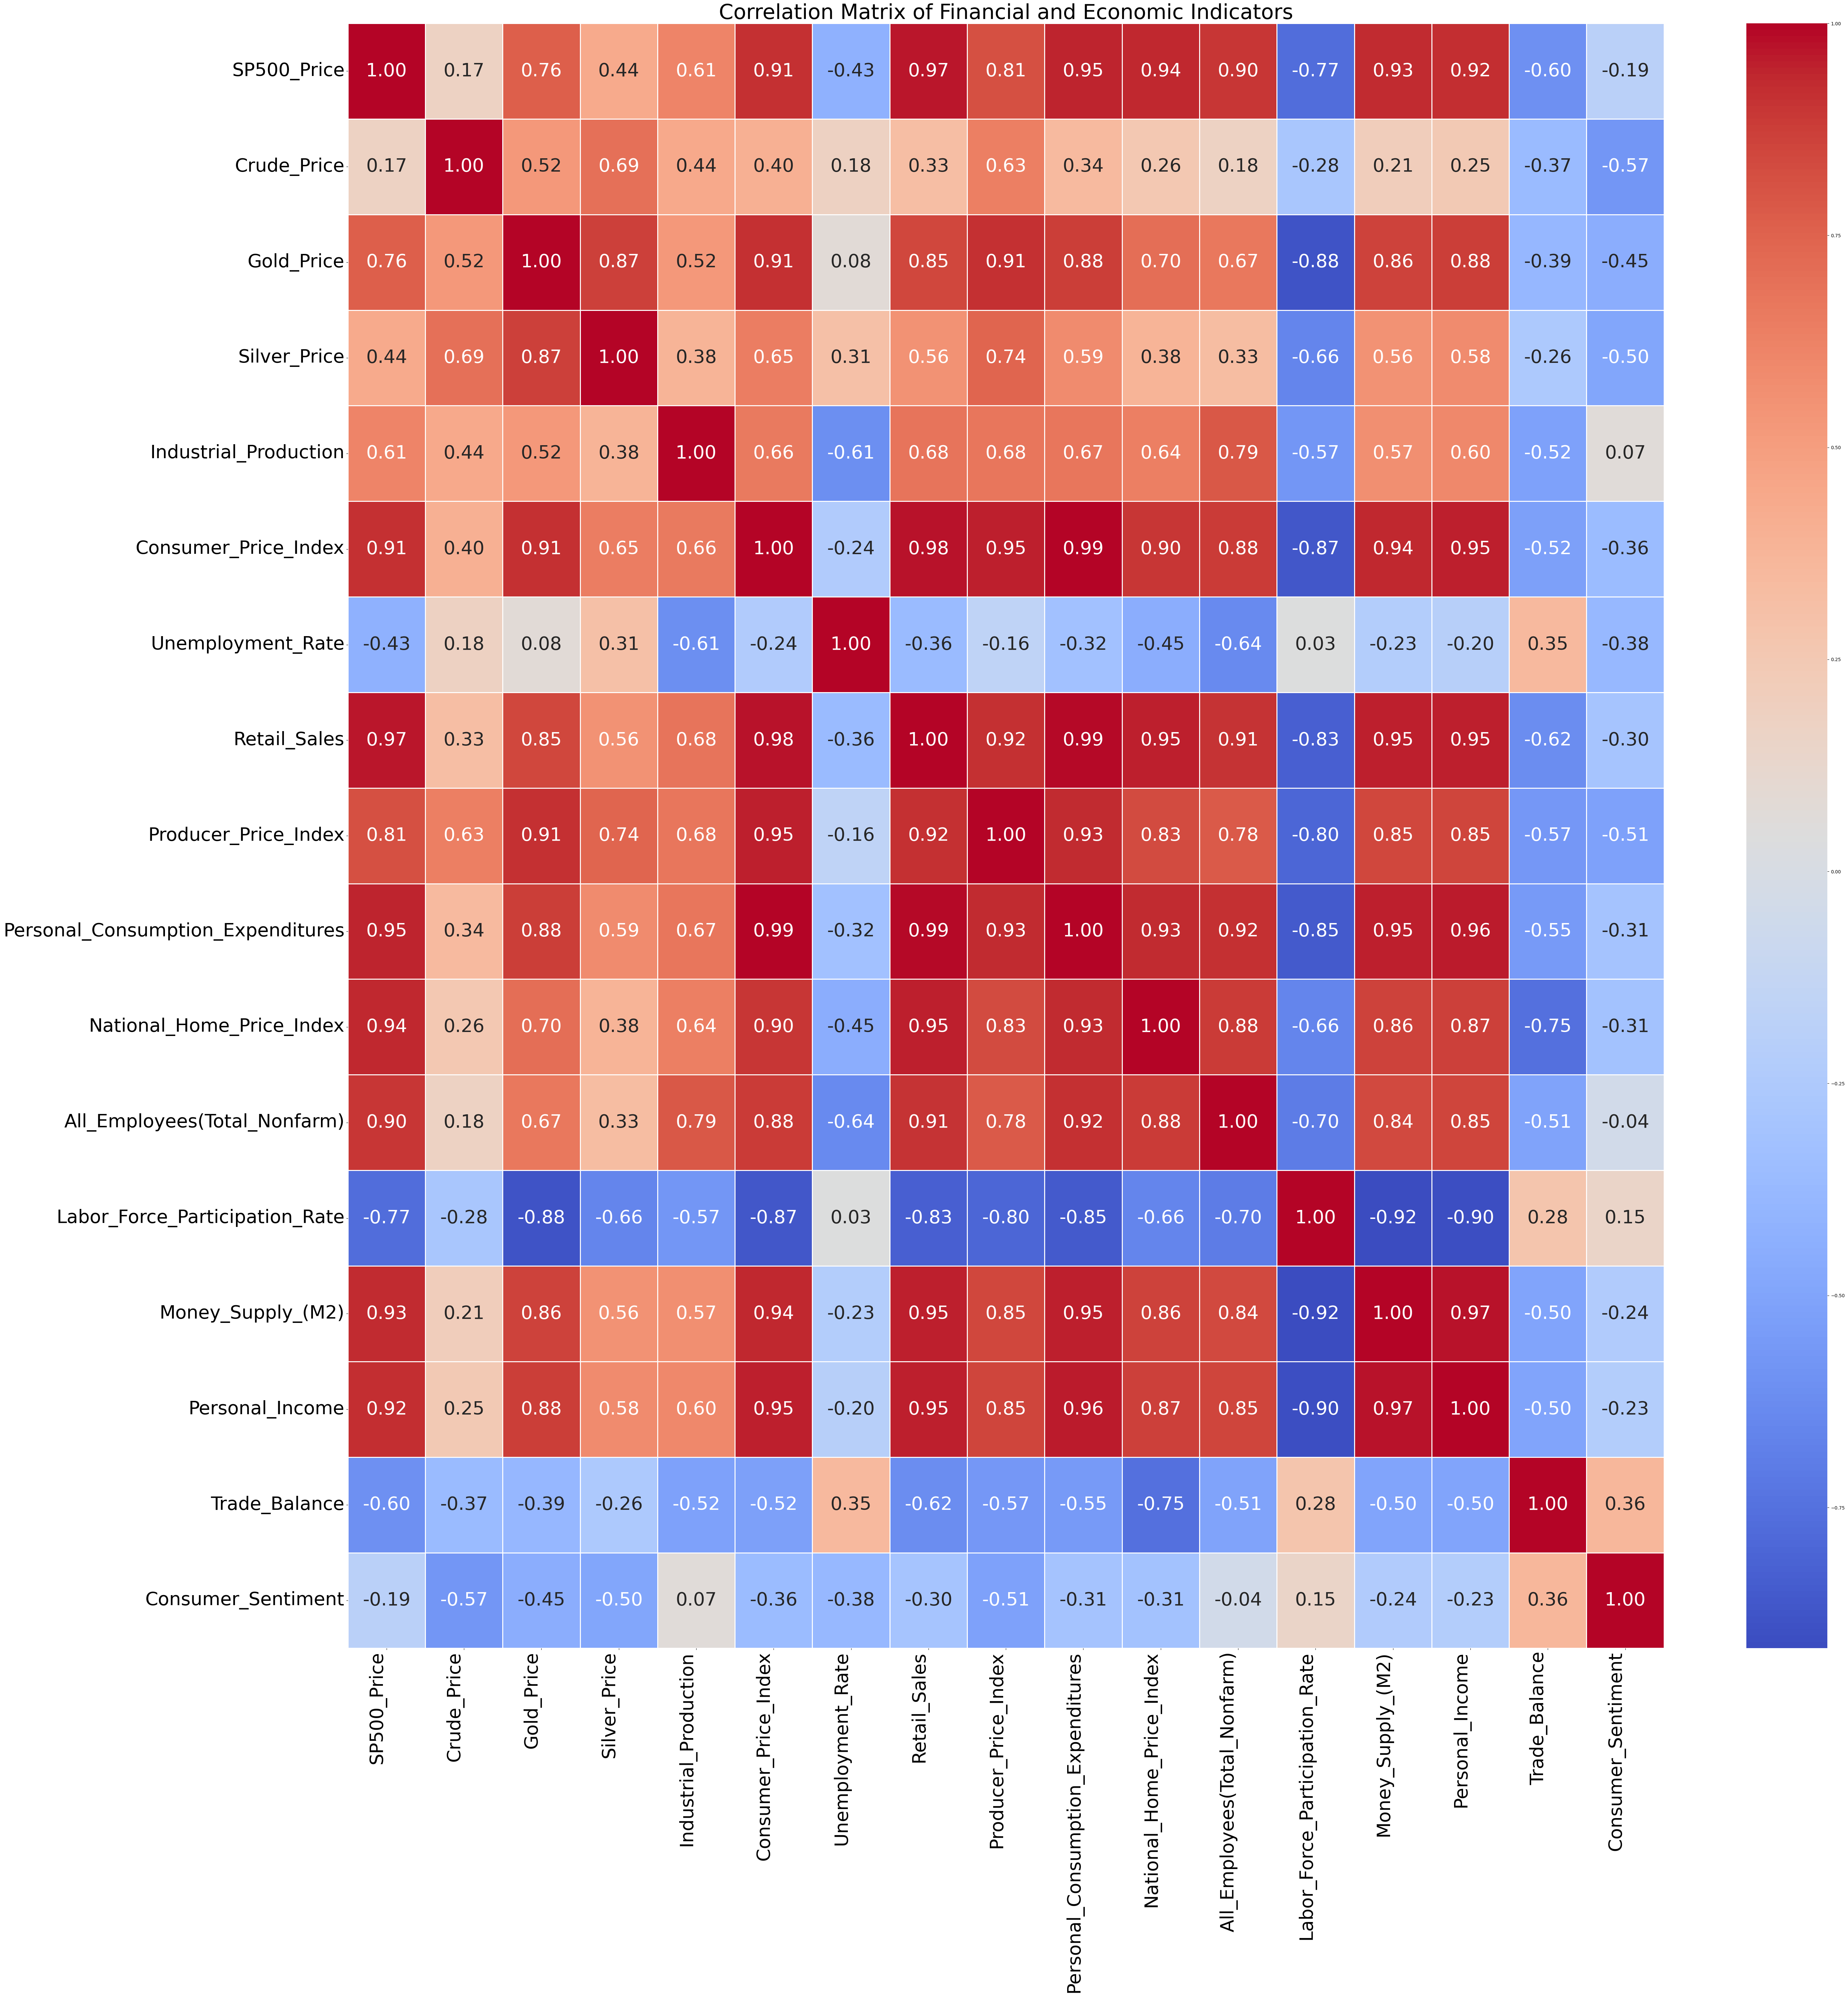

In [ ]:
# --- 4. Select numeric columns for correlation ---
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = smallmerged_df.select_dtypes(include=['number'])

# --- 5. Calculate Correlation Matrix ---
corr_matrix = df_numeric.corr()

# --- 6. Define columns for the heatmap (explicitly include all desired columns) ---
# Ensure these columns exist in your df_numeric after merging your actual data
columns_for_heatmap = [
    'SP500_Price',
    'Crude_Price',
    'Gold_Price',
    'Silver_Price',
    'Industrial_Production',
    'Consumer_Price_Index',
    'Unemployment_Rate',
    'Retail_Sales',
    'Producer_Price_Index',
    'Personal_Consumption_Expenditures',
    'National_Home_Price_Index',
    'All_Employees(Total_Nonfarm)',
    'Labor_Force_Participation_Rate',
    'Money_Supply_(M2)',
    'Personal_Income',
    'Trade_Balance',
    'Consumer_Sentiment',]

# Filter the list to only include columns that actually exist in the correlation matrix
existing_columns_for_heatmap = [col for col in columns_for_heatmap if col in corr_matrix.columns]

# Ensure there are enough columns to plot a heatmap
subset_corr = corr_matrix.loc[existing_columns_for_heatmap, existing_columns_for_heatmap]

    # --- 7. Plot the Heatmap ---
plt.figure(figsize=[60, 60]) # Increased size for more columns
sns.heatmap(subset_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.9, annot_kws={"size": 40}) # Smaller annotation font
plt.title("Correlation Matrix of Financial and Economic Indicators", fontsize=45)
plt.xticks(rotation=90, ha='right', fontsize=40) # Rotate and adjust font for readability
plt.yticks(rotation=0, fontsize=40)
plt.tight_layout()



# Plots


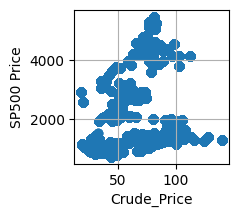

In [ ]:

plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Crude_Price'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Crude_Price')
plt.grid(True)
plt.show()

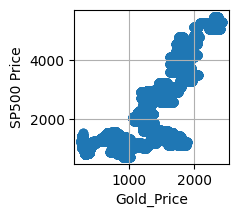

In [ ]:

plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Gold_Price'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Gold_Price')
plt.grid(True)
plt.show()

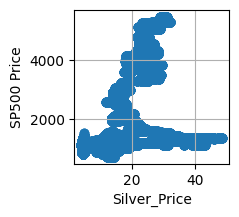

In [ ]:

plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Silver_Price'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Silver_Price')
plt.grid(True)
plt.show()

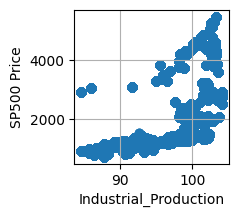

In [ ]:

plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Industrial_Production'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Industrial_Production')
plt.grid(True)
plt.show()

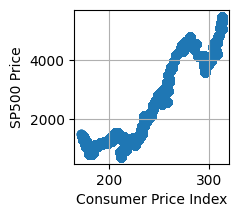

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Consumer_Price_Index'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Consumer Price Index')
plt.grid(True)
plt.show()

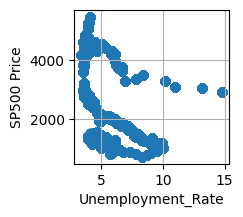

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Unemployment_Rate'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Unemployment_Rate')
plt.grid(True)
plt.show()

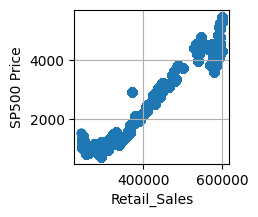

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Retail_Sales'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Retail_Sales')
plt.grid(True)
plt.show()

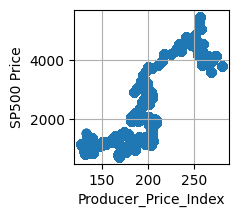

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Producer_Price_Index'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Producer_Price_Index')
plt.grid(True)
plt.show()

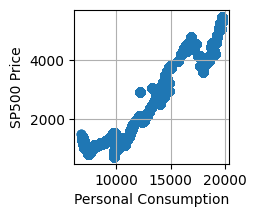

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Personal_Consumption_Expenditures'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Personal Consumption')
plt.grid(True)
plt.show()

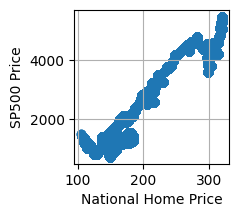

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['National_Home_Price_Index'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('National Home Price')
plt.grid(True)
plt.show()

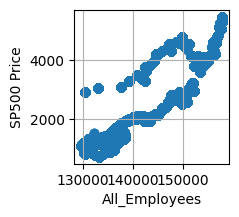

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['All_Employees(Total_Nonfarm)'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('All_Employees')
plt.grid(True)
plt.show()

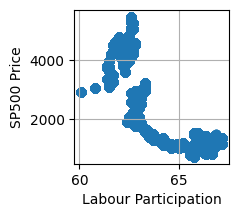

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Labor_Force_Participation_Rate'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Labour Participation')
plt.grid(True)
plt.show()

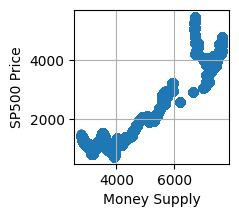

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Money_Supply_(M2)'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Money Supply')
plt.grid(True)
plt.show()

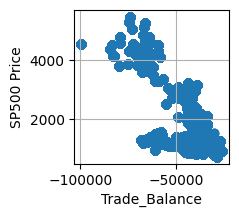

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Trade_Balance'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Trade_Balance')
plt.grid(True)
plt.show()

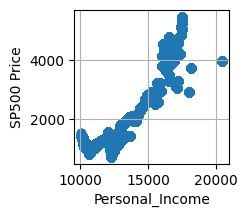

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Personal_Income'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Personal_Income')
plt.grid(True)
plt.show()

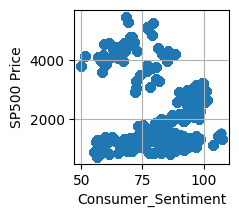

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(merged_df['Consumer_Sentiment'], merged_df['SP500_Price'], marker='o')
plt.ylabel('SP500 Price')
plt.xlabel('Consumer_Sentiment')
plt.grid(True)
plt.show()

# Linear Regression

Feature sets can be modified by adding or subtracting desired features in the code where X is declared

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = smallmerged_df[[
'Crude_Price',
'Gold_Price',
'Silver_Price'

]]
y = smallmerged_df['SP500_NextPrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 239815.97267008616
R² Score: 0.8021827273227049


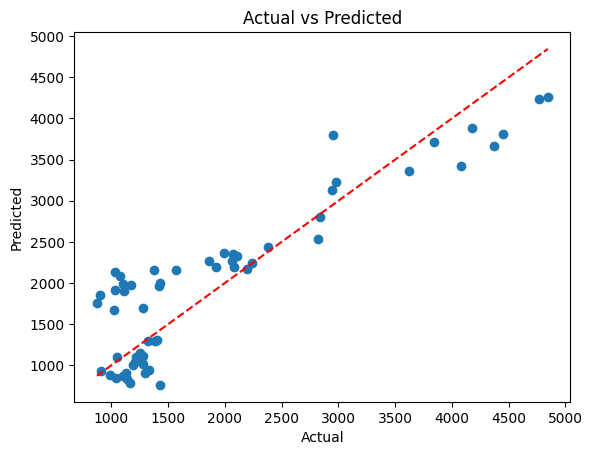

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Decision Tree

Feature sets can be modified by adding or subtracting desired features in the code where X is declared

In [ ]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

X = smallmerged_df[[
'Crude_Price',
]]
y = smallmerged_df['SP500_NextPrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

decisionmodel = DecisionTreeRegressor(max_depth=50)
decisionmodel.fit(X_train, y_train)
y_predd = decisionmodel.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_predd))
print("R² Score:", r2_score(y_test, y_predd))



Mean Squared Error: 2170941.1509383623
R² Score: -0.7907466831340999


In [ ]:
plt.figure(figsize=(15,8))
plot_tree(decisionmodel, filled=True, feature_names=X_train.columns)
plt.show()

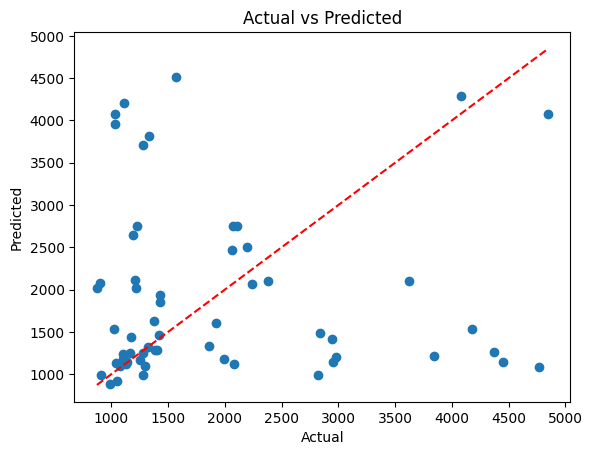

In [ ]:
plt.scatter(y_test, y_predd)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#Random Forest

Feature sets can be modified by adding or subtracting desired features in the code where X is declared

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = smallmerged_df[[
'National_Home_Price_Index',
'Personal_Income',
'Personal_Consumption_Expenditures'
]]
y = smallmerged_df['SP500_NextPrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

forestmodel = RandomForestRegressor(max_depth=30, random_state=1,n_estimators=5
)
forestmodel.fit(X_train, y_train)
y_predf = forestmodel.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_predf))
print("R² Score:", r2_score(y_test, y_predf))

Mean Squared Error: 4467.387212551732
R² Score: 0.9963149812560811


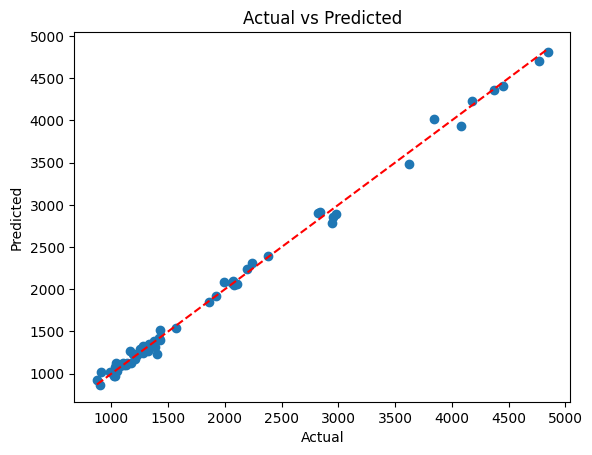

In [ ]:
plt.scatter(y_test, y_predf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#Multilayer Perceptron Regressor


Feature sets can be modified by adding or subtracting desired features in the code where X is declared

In [ ]:
X = smallmerged_df[[

 'Unemployment_Rate',
 'Retail_Sales',
 'Producer_Price_Index',
 'Crude_Price',

]]
y = smallmerged_df['SP500_NextPrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
from sklearn.neural_network import MLPRegressor

MLP=MLPRegressor(hidden_layer_sizes=(128,64,32), activation='relu', solver='adam', max_iter=4000, random_state=1)
MLP.fit(X_train, y_train)
y_predm = MLP.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_predm))
print("R² Score:", r2_score(y_test, y_predm))

Mean Squared Error: 1618858.9610153178
R² Score: -0.33535002256834723


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predm)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

The following code is used to test multiple combinations of structures for the same feature sets



In [ ]:
from itertools import combinations
values = [256, 128, 64, 32, 16, 8, 4,2]
lists = list(combinations(values, 4))
for lst in lists:
  MLP=MLPRegressor(hidden_layer_sizes=lst, activation='relu', solver='adam', max_iter=4000, random_state=1)
  MLP.fit(X_train, y_train)
  y_predm = MLP.predict(X_test)
  print(lst)
  print("Mean Squared Error:", mean_squared_error(y_test, y_predm))
  print("R² Score:", r2_score(y_test, y_predm))

(256, 128, 64, 32)
Mean Squared Error: 1568453.5442258962
R² Score: -0.2937720493982161
(256, 128, 64, 16)
Mean Squared Error: 1657407.9406184687
R² Score: -0.36714796298359453
(256, 128, 64, 8)
Mean Squared Error: 1662840.8364449008
R² Score: -0.3716294019101132
(256, 128, 64, 4)
Mean Squared Error: 1601478.2567841413
R² Score: -0.3210131814065953


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(256, 128, 64, 2)
Mean Squared Error: 4865942.3290762575
R² Score: -3.013775353767075
(256, 128, 32, 16)
Mean Squared Error: 1581576.6871655306
R² Score: -0.3045969511608859
(256, 128, 32, 8)
Mean Squared Error: 1546813.527922906
R² Score: -0.27592182466927895
(256, 128, 32, 4)
Mean Squared Error: 1644688.6347449063
R² Score: -0.35665617475847156
(256, 128, 32, 2)
Mean Squared Error: 1587618.32779596
R² Score: -0.3095805261025435
(256, 128, 16, 8)
Mean Squared Error: 1586749.348068132
R² Score: -0.30886372981138366


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(256, 128, 16, 4)
Mean Squared Error: 4867164.843946405
R² Score: -3.0147837709910297
(256, 128, 16, 2)
Mean Squared Error: 1597766.9117508987
R² Score: -0.31795180003042467
(256, 128, 8, 4)
Mean Squared Error: 1681897.5107762332
R² Score: -0.38734870242438535
(256, 128, 8, 2)
Mean Squared Error: 1641966.5573409514
R² Score: -0.354410811690818
(256, 128, 4, 2)
Mean Squared Error: 1647561.4723837809
R² Score: -0.35902589559165676
(256, 64, 32, 16)
Mean Squared Error: 1583304.3004618764
R² Score: -0.30602200949507097
(256, 64, 32, 8)
Mean Squared Error: 1575700.0600343447
R² Score: -0.2997494910910272
(256, 64, 32, 4)
Mean Squared Error: 1612408.6850208973
R² Score: -0.3300293761117101
(256, 64, 32, 2)
Mean Squared Error: 1572260.378189658
R² Score: -0.2969121968365298
(256, 64, 16, 8)
Mean Squared Error: 1622040.0659932066
R² Score: -0.33797402423020406
(256, 64, 16, 4)
Mean Squared Error: 1618167.267557653
R² Score: -0.33477946460341856
(256, 64, 16, 2)
Mean Squared Error: 1619027.6683

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(256, 64, 8, 4)
Mean Squared Error: 4866034.644114522
R² Score: -3.013851501777123
(256, 64, 8, 2)
Mean Squared Error: 1638527.626949186
R² Score: -0.3515741372881418
(256, 64, 4, 2)
Mean Squared Error: 1613874.2649276676
R² Score: -0.3312382906674005
(256, 32, 16, 8)
Mean Squared Error: 1652443.1355290464
R² Score: -0.3630526385928585


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(256, 32, 16, 4)
Mean Squared Error: 4866669.851478371
R² Score: -3.0143754659939432
(256, 32, 16, 2)
Mean Squared Error: 1656706.7816729916
R² Score: -0.3665695972110261
(256, 32, 8, 4)
Mean Squared Error: 1639430.8458793066
R² Score: -0.35231917650883116


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(256, 32, 8, 2)
Mean Squared Error: 4868616.257439126
R² Score: -3.015981000080737
(256, 32, 4, 2)
Mean Squared Error: 1626608.7525773975
R² Score: -0.3417426019014058
(256, 16, 8, 4)
Mean Squared Error: 1654933.033424465
R² Score: -0.365106483486644
(256, 16, 8, 2)
Mean Squared Error: 1633921.0384053378
R² Score: -0.3477742953845997
(256, 16, 4, 2)
Mean Squared Error: 1656157.0410957818
R² Score: -0.36611613207918836


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(256, 8, 4, 2)
Mean Squared Error: 4490986.312177492
R² Score: -2.7044849599245655
(128, 64, 32, 16)
Mean Squared Error: 1624341.4228052774
R² Score: -0.3398723470272742
(128, 64, 32, 8)
Mean Squared Error: 1649335.6513808453
R² Score: -0.3604893646280727
(128, 64, 32, 4)
Mean Squared Error: 1583115.9744341567
R² Score: -0.3058666647915347


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(128, 64, 32, 2)
Mean Squared Error: 4867770.68063963
R² Score: -3.0152835081895457
(128, 64, 16, 8)
Mean Squared Error: 1567053.7419259017
R² Score: -0.2926173928914402
(128, 64, 16, 4)
Mean Squared Error: 1620717.17713343
R² Score: -0.33688281139987186
(128, 64, 16, 2)
Mean Squared Error: 1626204.1969888257
R² Score: -0.34140889567539157
(128, 64, 8, 4)
Mean Squared Error: 1596546.0401126859
R² Score: -0.3169447382610544
(128, 64, 8, 2)
Mean Squared Error: 1621098.7259483072
R² Score: -0.3371975400024414
(128, 64, 4, 2)
Mean Squared Error: 1550941.8342226692
R² Score: -0.2793271453570678
(128, 32, 16, 8)
Mean Squared Error: 1608644.4704368059
R² Score: -0.3269243841693199
(128, 32, 16, 4)
Mean Squared Error: 1692289.1167700547
R² Score: -0.39592043821640766


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(128, 32, 16, 2)
Mean Squared Error: 4865999.82115682
R² Score: -3.0138227773246085
(128, 32, 8, 4)
Mean Squared Error: 1577373.174718746
R² Score: -0.30112959509352377


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(128, 32, 8, 2)
Mean Squared Error: 4869078.852078227
R² Score: -3.01636258104402


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(128, 32, 4, 2)
Mean Squared Error: 4868648.196197147
R² Score: -3.0160073454401974
(128, 16, 8, 4)
Mean Squared Error: 1589194.3884961505
R² Score: -0.31088057307528816
(128, 16, 8, 2)
Mean Squared Error: 1624391.376409763
R² Score: -0.33991355231351794


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(128, 16, 4, 2)
Mean Squared Error: 4863427.731301126
R² Score: -3.011701134655568
(128, 8, 4, 2)
Mean Squared Error: 1597560.2806087988
R² Score: -0.3177813559664815
(64, 32, 16, 8)
Mean Squared Error: 1641967.8074350671
R² Score: -0.35441184285736527
(64, 32, 16, 4)
Mean Squared Error: 1643795.7671822566
R² Score: -0.35591967408197855


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(64, 32, 16, 2)
Mean Squared Error: 4864976.748927243
R² Score: -3.0129788745772075


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(64, 32, 8, 4)
Mean Squared Error: 4865141.778571015
R² Score: -3.0131150027661624


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(64, 32, 8, 2)
Mean Squared Error: 4870959.49064275
R² Score: -3.0179138655042816


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(64, 32, 4, 2)
Mean Squared Error: 4482472.778206847
R² Score: -2.69746239152694
(64, 16, 8, 4)
Mean Squared Error: 1617122.8790892928
R² Score: -0.33391797870601847
(64, 16, 8, 2)
Mean Squared Error: 1667845.7704689344
R² Score: -0.3757578275005393
(64, 16, 4, 2)
Mean Squared Error: 1649871.8098479807
R² Score: -0.3609316262694082


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


(64, 8, 4, 2)
Mean Squared Error: 4870193.202351383
R² Score: -3.0172817764144897
(32, 16, 8, 4)
Mean Squared Error: 1591421.421495085
R² Score: -0.3127175883045348
(32, 16, 8, 2)
Mean Squared Error: 1628178.0132588353
R² Score: -0.3430370397349891
(32, 16, 4, 2)
Mean Squared Error: 1638162.8954834295
R² Score: -0.351273280831367
(32, 8, 4, 2)
Mean Squared Error: 1609076.8177893837
R² Score: -0.3272810150191503
(16, 8, 4, 2)
Mean Squared Error: 1587976.7741661146
R² Score: -0.309876198165399


#Recurrent Neural Network





Feature sets can be modified by adding or subtracting desired features in the code where X is declared

In [ ]:
#Setup
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, callbacks, Sequential

# ---- CONFIGURATION that can be tweaked ----
LOOKBACK = 14
HORIZON = 1
VAL_RATIO = 0.15
TEST_RATIO = 0.15
UNITS = 32
BATCH = 16
EPOCHS = 200
PATIENCE = 20


merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.sort_values('date').reset_index(drop=True)


X = merged_df[[
'National_Home_Price_Index',
'Personal_Income',
'Personal_Consumption_Expenditures'
]]
y = merged_df[['SP500_NextPrice']].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=1
)

X_raw=X
y_raw=y

# 2) Scale features (and optionally y for stability)
x_scaler = StandardScaler().fit(X_raw)
y_scaler = StandardScaler().fit(y_raw)
X_scaled = x_scaler.transform(X_raw)
y_scaled = y_scaler.transform(y_raw)

# 3) Build sliding windows: shape (num_samples, LOOKBACK, num_features)
def make_windows(X, y, lookback=LOOKBACK, horizon=HORIZON):
    Xw, yw = [], []
    for i in range(len(X) - lookback - horizon + 1):
        Xw.append(X[i:i+lookback])
        yw.append(y[i+lookback+horizon-1])  # last point of horizon
    return np.array(Xw), np.array(yw)

Xw, yw = make_windows(X_scaled, y_scaled)

# 4) Chronological split (no shuffling)
n = len(Xw)
n_test  = int(np.floor(TEST_RATIO * n))
n_val   = int(np.floor(VAL_RATIO  * n))
n_train = n - n_val - n_test

X_train, y_train = Xw[:n_train], yw[:n_train]
X_val,   y_val   = Xw[n_train:n_train+n_val], yw[n_train:n_train+n_val]
X_test,  y_test  = Xw[n_train+n_val:],        yw[n_train+n_val:]

# 5) tf.data pipelines (optional but nice)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH).prefetch(1)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(1)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH)

# 6) Define a tiny GRU model (swap to LSTM if you prefer)
model = Sequential([
    layers.Input(shape=(LOOKBACK, X_train.shape[-1])),
    layers.GRU(UNITS, dropout=0.2, recurrent_dropout=0),
    # layers.GRU(64, return_sequences=True, dropout=0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse')

es = callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=[es], verbose=0)

# 7) Evaluate (invert scaling to meaningful units)
y_pred_test_scaled = model.predict(test_ds).reshape(-1, 1)
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled).ravel()

# Align true test y and invert
y_true_test = y_scaler.inverse_transform(y_test).ravel()

mse = mean_squared_error(y_true_test, y_pred_test)
r2   = r2_score(y_true_test, y_pred_test)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE : {mae:.3f}")
print(f"Test R^2 : {r2:.3f}")


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test RMSE: 3103408.383
Test MAE : 1710.882
Test R^2 : -16.323
